# Clean the data. Detect and remove outliers.

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
weather_data = pd.read_csv('testset.csv')

# Extracting month from datetime_utc

In [3]:
weather_df = pd.DataFrame(weather_data)
weather_df['month'] = pd.to_datetime(weather_df['datetime_utc']).dt.month

# Filling the NaN values with the mean values

In [4]:
weather_df = weather_df.fillna(weather_df.mean())

# Dropping unnecessary columns

In [5]:
wdf = weather_df.drop([' _precipm', ' _wdire', ' _conds'], axis=1)

# Removing Outliers

In [6]:
cleaned = wdf[(wdf[' _pressurem'] < 1030.0) & (wdf[' _pressurem'] > 990.0)]
cleaned = cleaned[cleaned[' _vism'] < 3]
cleaned = cleaned[cleaned[' _wdird'] < 400]

# Grouping the dataframe by month and calculating mean

In [11]:
new_df = cleaned.groupby('month').mean()

# Plotting the numeric data over the duration of a month

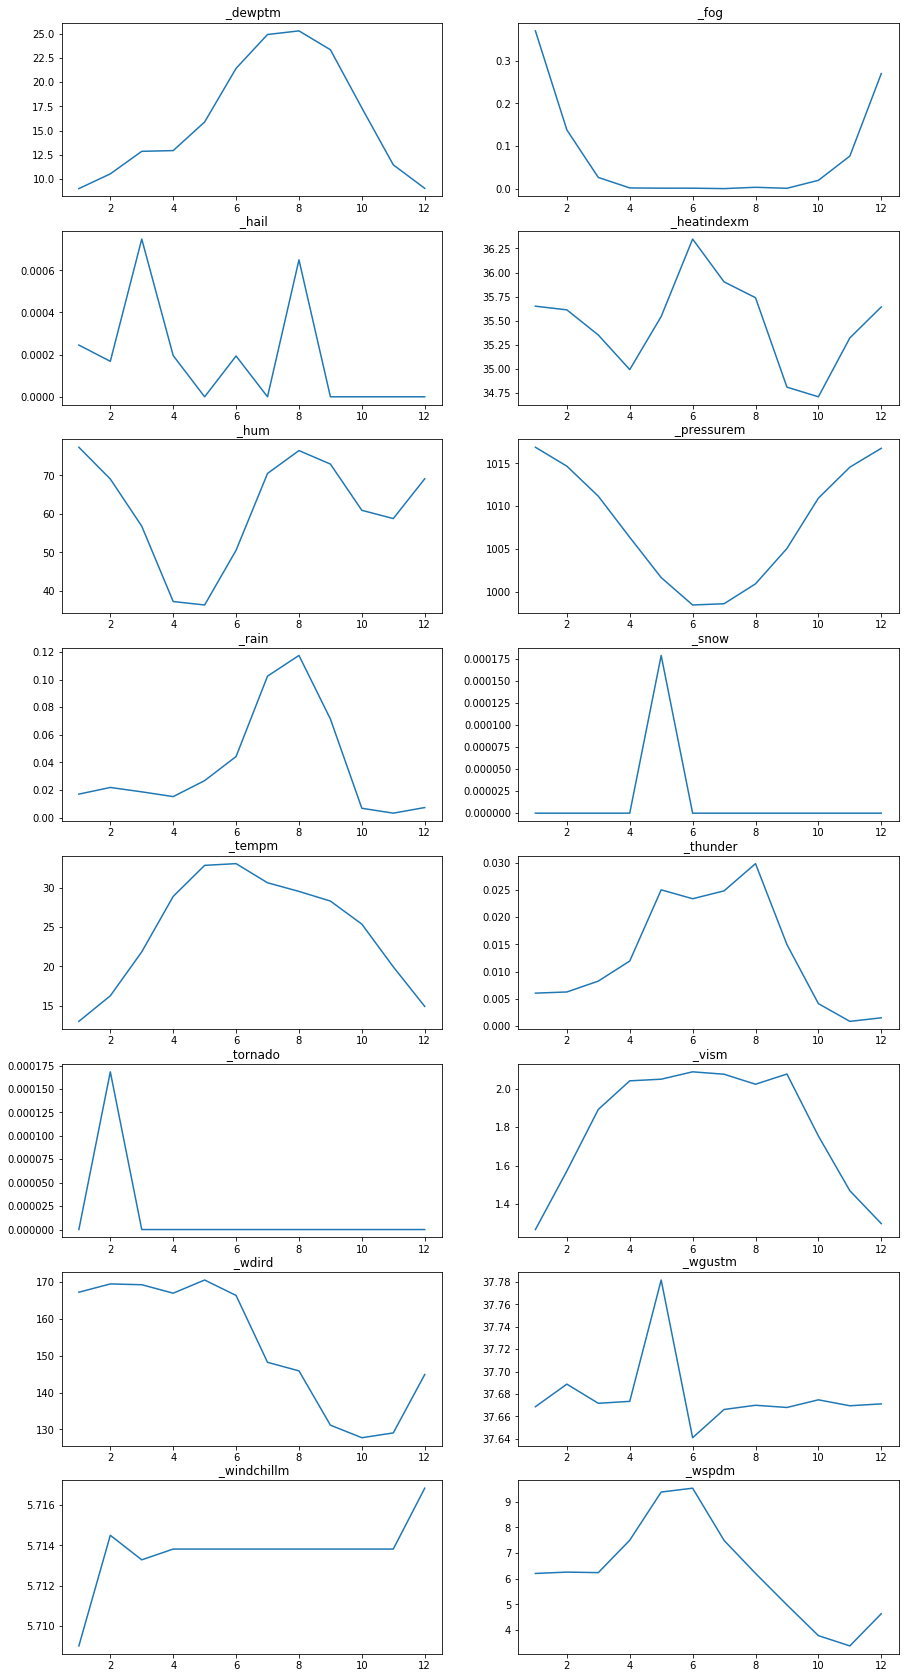

In [12]:
plt.figure(figsize = (15, 30))
lst = [' _dewptm', ' _fog', ' _hail', ' _heatindexm', ' _hum', ' _pressurem',
       ' _rain', ' _snow', ' _tempm', ' _thunder', ' _tornado', ' _vism',
       ' _wdird', ' _wgustm', ' _windchillm', ' _wspdm']
z = 0
for i in range(16):
        plt.subplot(8,2,i+1)
        plt.plot(new_df[lst[z]])
        plt.title('{}'.format(lst[z]))
        z+=1

# Plotting Monthly Pie Charts for different conditions
### Data is filtered according to month and then grouped by condition and plotted in a pie chart.

In [9]:
data = weather_df[[' _conds','month']]

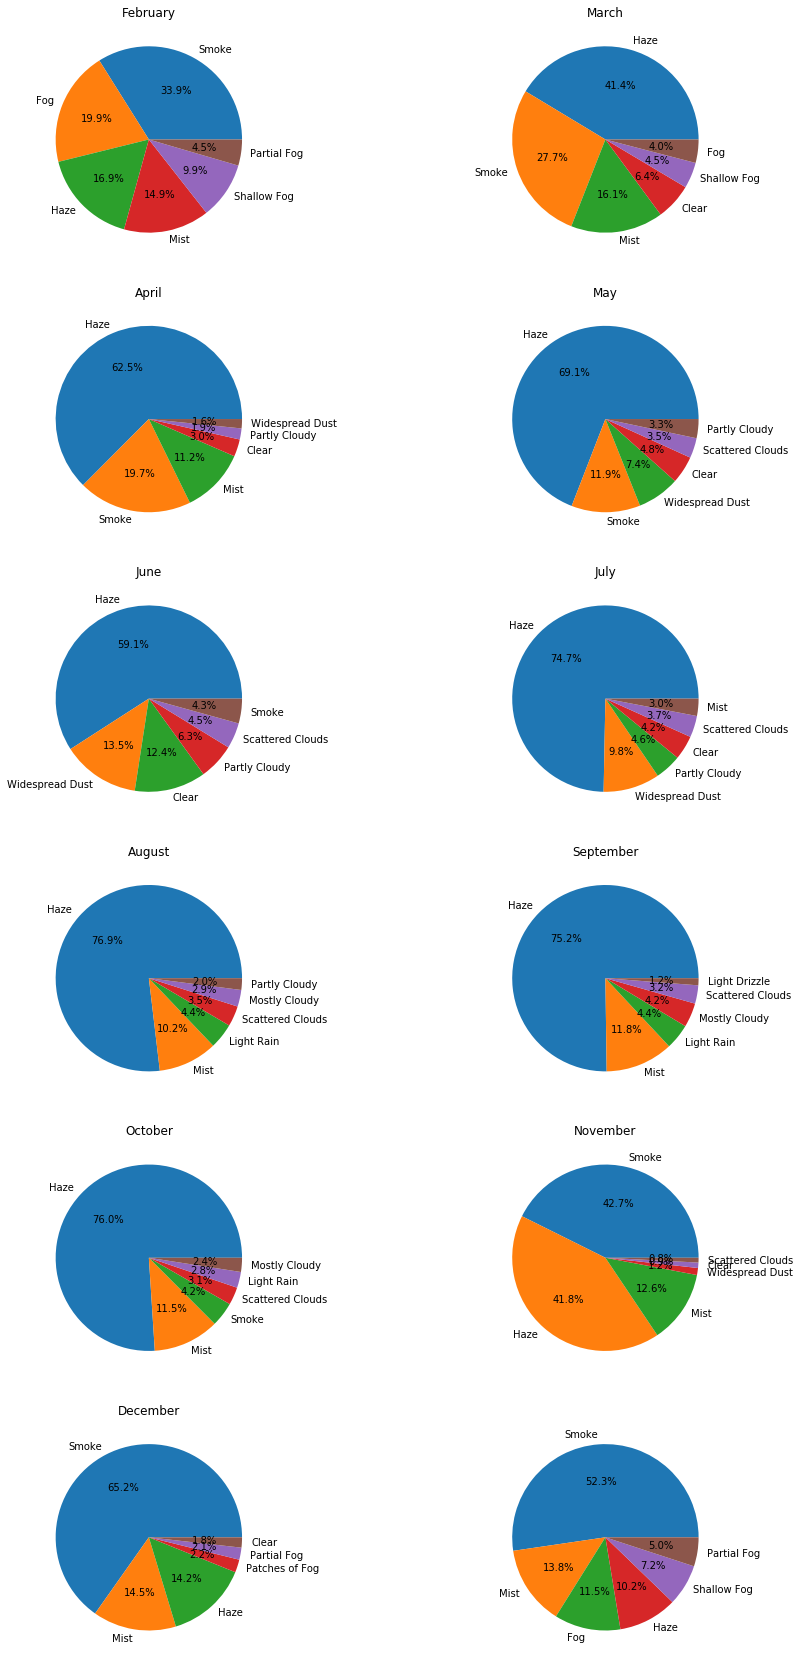

In [10]:
plt.figure(figsize = (15, 30))
lst = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in range(12):
    f = pd.DataFrame(data[data['month'] == i+1])[' _conds'].value_counts().reset_index()[:6]                              
    f.columns = ['conds', 'value']
    conditions = f['conds']
    slices = f['value']
    plt.title('{}'.format(lst[i]))
    plt.subplot(6,2,i+1).pie(slices, labels=conditions, autopct="%1.1f%%") 